### Noise calculations for paper revisions


This notebook explores the model training noise as requested during the first round of paper review.

We use the conda environment `analysis`


#### Define paths to model files

In [1]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/processed_data/trained_models/'
model_1 = f'{root}V20_noise_expt_1/'
model_2 = f'{root}V20_noise_expt_2/'
model_3 = f'{root}V20_noise_expt_3/'
model_4 = f'{root}V20_noise_expt_4/'

#### Define some useful functions

In [2]:
import pandas as pd
def load_predictions(path):

    df = pd.read_parquet(path+'predictions.parquet')
    
    
    #Calculate some extra columns
    df['model_predicion_bias'] = df.MODIS_LST - df.predictions
    df['model_predicion_error'] = abs(df.MODIS_LST - df.predictions)
        
    df['ERA_predicion_bias'] = df.MODIS_LST - df.skt_unnormalised
    df['ERA_predicion_error'] = abs(df.MODIS_LST - df.skt_unnormalised)


    print ('----------------------------------MODEL-------------------------------------------------')
    print("Mean/Median/Std prediction bias:", df['model_predicion_bias'].mean(), df['model_predicion_bias'].median(),df['model_predicion_bias'].std())
    print("Mean/Median/Std prediction error:", df['model_predicion_error'].mean(), df['model_predicion_error'].median(),df['model_predicion_error'].std())
    # print ('------------------------------------ERA---------------------------------------------------')
    # print("Mean/Median/Std prediction bias:", df['ERA_predicion_bias'].mean(), df['ERA_predicion_bias'].median(),df['ERA_predicion_bias'].std())
    # print("Mean/Median/Std prediction error:", df['ERA_predicion_error'].mean(), df['ERA_predicion_error'].median(),df['ERA_predicion_error'].std())
    # print ('-------------------------------------------------------------------------------------------')

    
    
    #Average predictions and errors over the year
    df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean() 
    
    
    
    
    
    return df,df_grouped

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 




        
        
        
def global_plot(df,z,projection,vmin,vmax,cmap,absolute_values,logscale,title,markersize,savefig):
    
    
        
       # ccrs.Robinson()
        
    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=projection)
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    try:
        x = df.longitude
        y = df.latitude
    except: #different sources call lat/lon different things
        x = df.longitude_ERA
        y = df.latitude_ERA

    z1 = df[z]
    if absolute_values:
        z1 = abs(z1)
        if vmin < 0:
            vmin = 0 # dont need negative vmins if plotting absolute values
    
    
    #Normalize, colorbars
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        

     #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
    
    
    
    
    
    
    #Scatter points
    sc = ax.scatter(x,y,transform=ccrs.PlateCarree(), #Always PlateCarree
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)

    ax.set_title(title)    
    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)   
        
        
        
        
            

In [3]:
models_to_compare = [model_1,model_2, model_3,model_4]


annually_averaged_dfs = []
for m in models_to_compare:
    predictions,predictions_averaged = load_predictions(m)
    annually_averaged_dfs.extend([predictions_averaged])



----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.03033202 0.1646728515625 3.752133846282959
Mean/Median/Std prediction error: 2.9254482 2.22674560546875 2.460106134414673


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: -0.007963768 0.139404296875 3.738788366317749
Mean/Median/Std prediction error: 2.9157598 2.22027587890625 2.4527735710144043


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.007012897 0.1645050048828125 3.75597882270813
Mean/Median/Std prediction error: 2.9231608 2.218292236328125 2.4682388305664062


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


----------------------------------MODEL-------------------------------------------------
Mean/Median/Std prediction bias: 0.09345146 0.24273681640625 3.766803503036499
Mean/Median/Std prediction error: 2.938286 2.23773193359375 2.4697763919830322


<ipython-input-2-019f89ba43d9>:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['latitude_ERA', 'longitude_ERA'],as_index=False).mean()


#### Load the change in fields file - we will use this to categorise gridpoints

In [4]:
change_in_fields = pd.read_pickle('tmp_data/change_in_fields.pkl')
change_in_fields['latitude_join'] = round(change_in_fields.latitude_ERA,3)
change_in_fields['longitude_join'] = round(change_in_fields.longitude_ERA,3) #just used for joining due to loss of precision from Margs file

In [5]:
change_in_fields.columns

Index(['latitude_ERA', 'longitude_ERA', 'V15_clFr', 'V15_cvhFr', 'V15_cvlFr',
       'V15_dl', 'V15_oceanFr', 'V15_si10Fr', 'V15_z', 'V20_clFr', 'V20_cvhFr',
       'V20_cvlFr', 'V20_dl', 'V20_oceanFr', 'V20_si10Fr', 'V20_z',
       'changeAbs_V20V15_clFr', 'changeAbs_V20V15_cvhFr',
       'changeAbs_V20V15_cvlFr', 'changeAbs_V20V15_oceanFr',
       'changeAbs_V20V15_si10Fr', 'changeAbs_V20V15_dl', 'changeAbs_V20V15_z',
       'clFr_change_is_significant', 'cvhFr_change_is_significant',
       'cvlFr_change_is_significant', 'oceanFr_change_is_significant',
       'si10Fr_change_is_significant', 'dl_change_is_significant',
       'z_change_is_significant', 'bitstring', 'latitude_join',
       'longitude_join'],
      dtype='object')

#### Create a new df and concat it with the change in fields df

In [6]:
#Create a new df that will just hold the differences   

df =annually_averaged_dfs[0] #pick a df to get latitudes 
data = { 'latitude_ERA':     df.latitude_ERA, 
         'longitude_ERA':    df.longitude_ERA,
         'MODIS_LST':        df.MODIS_LST,
          'latitude_join':    round(df.latitude_ERA,3), 
          'longitude_join':    round(df.longitude_ERA,3)}


i = 1
selected_cols = [] #we will use this later when computing variances
for df in annually_averaged_dfs:
    data[f'prediction_error_{i}'] = df['model_predicion_error']
    data[f'prediction_{i}'] = df['predictions']

    selected_cols.extend([f'prediction_error_{i}'])
    i = i+1

df_new = pd.DataFrame(data)   

In [7]:
#Join and save
df_cat = pd.merge(df_new,change_in_fields,how='inner',on=['latitude_join', 'longitude_join'],suffixes=('', '_y')) #inner join.
df_cat = df_cat.drop(['latitude_join', 'longitude_join','latitude_ERA_y', 'longitude_ERA_y'], axis=1) #Get rid of junk columns

#### LAKES

In [26]:
pd.options.mode.chained_assignment = None #Ignore SettingWithCopyWarning - we are safe here


def surface_noise_numbers(df):
    df['variance']=df[selected_cols].var(axis=1) #variance over the prediciton errors i.e. noise 
    df['median_error']=df[selected_cols].median(axis=1) #mean over the prediciton errors 
    df['mean_error']=df[selected_cols].mean(axis=1) #mean over the prediciton errors 
    
    print("Numer of grid points:", len(df))
    print("Median variance:", df['variance'].median())
    print("Mean variance:", df['variance'].mean())
    
    print("Median median error:", df['median_error'].median())
    print("Mean mean error:", df['mean_error'].mean())
    
    df['variance'].hist(bins=100,figsize=(12,8))





Numer of grid points: 1631
Median variance: 0.006851328536868095
Mean variance: 0.07685616
Median median error: 2.6176199913024902
Mean mean error: 2.823403


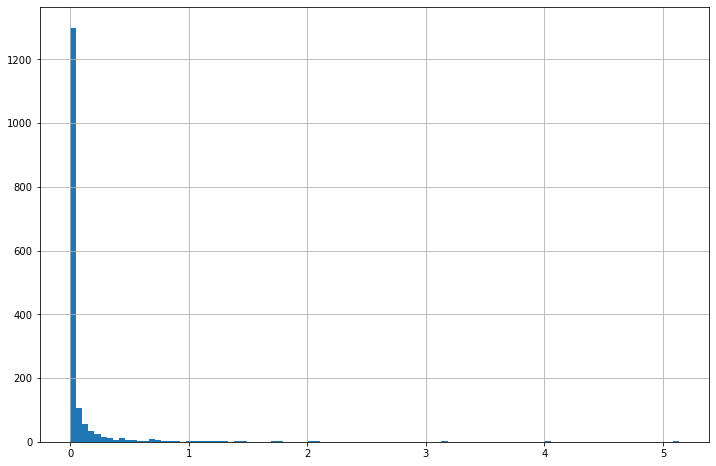

In [27]:
df_lake = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant')
surface_noise_numbers(df_lake)

#### Lake ground

In [28]:
df_lake_ground = df_cat.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')


Numer of grid points: 546
Median variance: 0.021319884806871414
Mean variance: 0.14884458
Median median error: 2.8129749298095703
Mean mean error: 3.121384


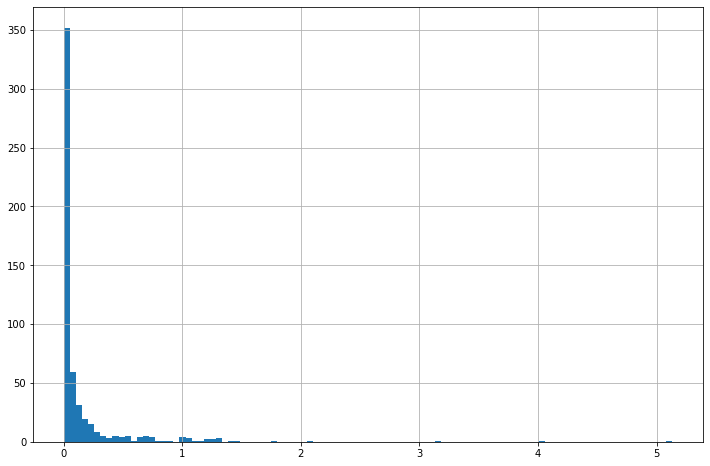

In [29]:
surface_noise_numbers(df_lake_ground)

#### Vegetation

In [30]:
df_vegetation = df_cat.query('cvhFr_change_is_significant & not clFr_change_is_significant')


In [34]:
df_vegetation

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
2502,-51.288034,-73.333333,274.249908,4.355251,274.621124,4.088660,274.696167,3.831044,275.177643,3.803288,...,True,True,False,True,True,False,0111010,0.066592,3.959852,4.019560
2670,-49.039793,-72.916667,280.344543,4.163730,276.653198,4.663658,276.033081,4.316387,276.385956,4.963541,...,True,True,False,True,True,False,0111010,0.128522,4.490023,4.526829
2695,-48.758762,-73.200000,275.938141,3.492244,274.737122,3.675043,274.350159,4.622984,272.320557,6.412643,...,True,False,False,True,True,False,0101010,1.786387,4.149014,4.550729
2722,-48.477732,-72.400000,280.743073,4.414598,277.139343,6.266607,274.869965,5.846383,275.339478,6.638611,...,True,False,False,True,True,False,0101010,0.947399,6.056495,5.791550
2771,-47.915672,-72.800000,280.819336,6.009800,275.409607,6.887778,274.273254,5.489971,276.073547,6.660208,...,True,False,False,True,True,False,0101010,0.403267,6.335004,6.261940
2818,-47.353611,-73.200000,279.468872,3.741991,278.394257,3.612419,279.767181,3.798422,277.911926,3.855521,...,True,True,False,True,True,False,0111010,0.010818,3.770207,3.752088
2844,-47.072581,-73.200000,278.869751,5.516960,275.628174,5.249231,275.461975,5.199721,275.645691,5.661027,...,True,False,False,True,True,False,0101010,0.048159,5.383096,5.406735
2873,-46.791551,-73.200000,278.926392,4.596234,276.944244,5.311481,275.316132,7.772527,271.930725,6.002368,...,True,True,False,False,True,False,0111000,1.853764,5.656924,5.920653
2903,-46.510520,-73.125000,281.607971,4.306669,278.296234,4.088364,278.454407,4.131593,278.238159,4.180131,...,True,False,False,False,True,False,0101000,0.008914,4.155862,4.176689
2933,-46.229490,-73.125000,281.318878,3.368091,278.538269,4.167930,277.795990,3.886202,277.782959,4.025296,...,True,False,False,False,True,False,0101000,0.121597,3.955749,3.861880


Numer of grid points: 58
Median variance: 0.1282404065132141
Mean variance: 0.4836859
Median median error: 3.1680634021759033
Mean mean error: 3.48919


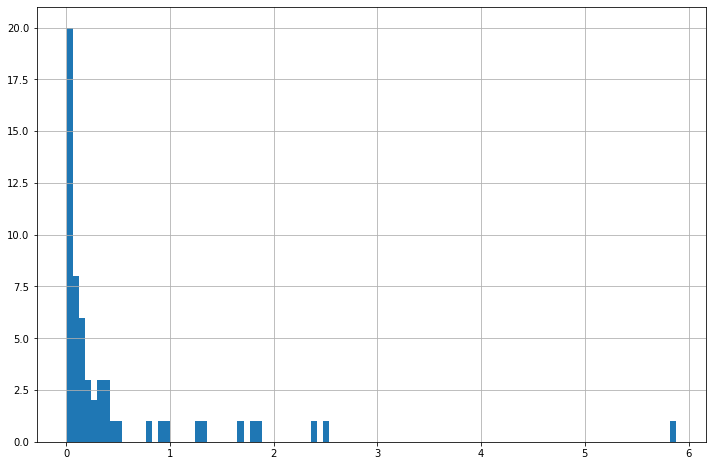

In [31]:
surface_noise_numbers(df_vegetation)

#### Glacier

Numer of grid points: 1057
Median variance: 0.0771985724568367
Mean variance: 0.1763997
Median median error: 4.226305961608887
Mean mean error: 4.449115


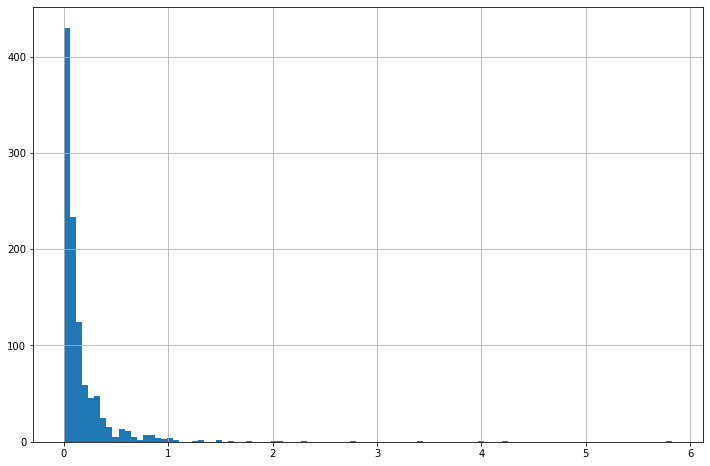

In [33]:
df_glacier = df_cat.query('si10Fr_change_is_significant')
surface_noise_numbers(df_glacier)

#### Deep dive on individual bad points

In [15]:
lake_natron = df_lake.query('latitude_ERA == -2.3887580539270044 & longitude_ERA == 36.0000')
lake_natron_northern_edge =df_lake.query('latitude_ERA == -2.10772769472398 & longitude_ERA == 36.0000') 
lake_blanche =df_lake.query('latitude_ERA ==  -29.367671674745356 & longitude_ERA == 139.6875') 
salt_lake_city =df_lake.query('latitude_ERA ==  41.17094491970063 & longitude_ERA ==  -113.39999999999998') 
farah_province =df_lake.query('latitude_ERA ==  31.615914311651938 & longitude_ERA == 61.120000000000005') 
gujarat_province =df_lake.query('latitude_ERA ==  24.028095261448925 & longitude_ERA ==  69.0') 
toshka_lakes =df_lake.query('latitude_ERA ==  23.18500423251539 & longitude_ERA ==  30.900000000000006') 
all_northern_canada_points = df_lake.query('50.0 < latitude_ERA & -130 < longitude_ERA < -80')

caspain_1 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==   49.125')
caspain_2 = df_lake.query('latitude_ERA ==  46.22948997297545 & longitude_ERA ==    49.5')
caspain_3 = df_lake.query('latitude_ERA ==  46.51052023808231 & longitude_ERA ==    49.5')
caspain_4 = df_lake.query('latitude_ERA ==  47.072580762649004 & longitude_ERA ==    51.599999999999994')

caspian_edge = pd.concat([caspain_1,caspain_2,caspain_3,caspain_4])

bering_glacier = df_glacier.query('latitude_ERA == 60.280999861571715   & longitude_ERA ==    -143.4666666666667')
juncal_glacier = df_glacier.query('latitude_ERA == -33.021065936911214   & longitude_ERA ==    -70.07999999999998')


In [36]:
lake_natron

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance,median_error,mean_error
38367,-2.388758,36.0,317.764862,5.572641,312.89682,7.060278,310.928833,6.585812,311.538116,4.995876,...,False,True,False,False,True,True,1011001,0.882251,6.079226,6.053652


In [16]:
selected_dfs = dict({'lake_natron':lake_natron,
                     'lake_natron_northern_edge':lake_natron_northern_edge,
                     'lake_blanche':lake_blanche,
                     'salt_lake_city':salt_lake_city,
                     'farah_province':farah_province,
                     'gujarat_province':gujarat_province,
                     'toshka_lakes':toshka_lakes,
                     'all_northern_canada_points':all_northern_canada_points,
                     'caspian_edge':caspian_edge,
                     'bering_glacier':bering_glacier,
                     'juncal_glacier':juncal_glacier})

lake_natron
Numer of grid points: 1
Median variance: 0.8822507858276367
Mean variance: 0.8822508
Median median error: 6.079226493835449
Mean mean error: 6.053652
************************
lake_natron_northern_edge
Numer of grid points: 1
Median variance: 0.3489096462726593
Mean variance: 0.34890965
Median median error: 4.802485466003418
Mean mean error: 4.6778073
************************
lake_blanche
Numer of grid points: 1
Median variance: 3.15419864654541
Mean variance: 3.1541986
Median median error: 2.902574062347412
Mean mean error: 3.656997
************************
salt_lake_city
Numer of grid points: 1
Median variance: 1.1283434629440308
Mean variance: 1.1283435
Median median error: 7.107099533081055
Mean mean error: 6.8822775
************************
farah_province
Numer of grid points: 1
Median variance: 0.0099698631092906
Mean variance: 0.009969863
Median median error: 3.05739688873291
Mean mean error: 3.0632102
************************
gujarat_province
Numer of grid points: 1


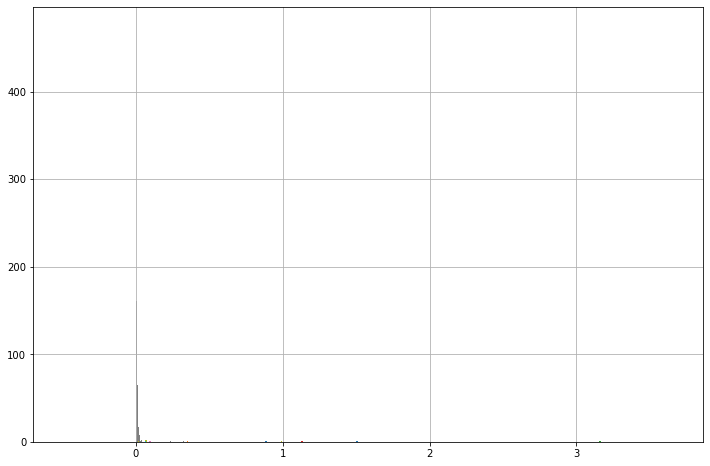

In [35]:
for key,value in selected_dfs.items():
    print(key)
    surface_noise_numbers(value)
    print("************************")

In [18]:
toshka_lakes[['MODIS_LST', 'prediction_1','prediction_2','prediction_3','prediction_4']]

,MODIS_LST,prediction_1,prediction_2,prediction_3,prediction_4
70081,318.107666,317.445587,319.022919,318.269714,316.384827


In [19]:
gujarat_province[['MODIS_LST', 'prediction_1','prediction_2','prediction_3','prediction_4']]

,MODIS_LST,prediction_1,prediction_2,prediction_3,prediction_4
71526,313.741486,303.26413,302.768799,302.143219,303.08667


In [20]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
71526,24.028095,69.0,313.741486,10.559154,303.26413,11.043591,302.768799,11.649204,302.143219,10.725573,...,0.267944,True,False,False,False,False,True,True,1001001,0.230965


In [21]:
gujarat_province

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
71526,24.028095,69.0,313.741486,10.559154,303.26413,11.043591,302.768799,11.649204,302.143219,10.725573,...,0.267944,True,False,False,False,False,True,True,1001001,0.230965


In [22]:
juncal_glacier['longitude_ERA'].to_numpy()[0]

-70.07999999999998

In [23]:
juncal_glacier

,latitude_ERA,longitude_ERA,MODIS_LST,prediction_error_1,prediction_1,prediction_error_2,prediction_2,prediction_error_3,prediction_3,prediction_error_4,...,changeAbs_V20V15_z,clFr_change_is_significant,cvhFr_change_is_significant,cvlFr_change_is_significant,oceanFr_change_is_significant,si10Fr_change_is_significant,dl_change_is_significant,z_change_is_significant,bitstring,variance
6228,-33.021066,-70.08,290.502838,6.622502,284.3349,4.130192,287.74173,4.671874,286.834991,6.334183,...,0.957031,False,False,False,False,True,True,False,0001010,1.501163
